# Data Exploration
----

## 0. Environment Configuration
----

### 0.1 Import Libraries

In [1]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt

### 0.2 Load Raw Data

In [2]:
data_path = "/".join(os.getcwd().split("/")[:-1]) + "/data/"

In [3]:
emissions_df = pd.read_csv(data_path + "raw/emissions.csv")

### 0.3 Add in Regional Metadata

In [9]:
continents_df = pd.read_csv(data_path + "raw/continents.csv")

In [10]:
continents_df = continents_df[['alpha-3', 'name', 'region', 'sub-region']]

In [11]:
regions = []
subregions = []

for index, row in emissions_df.iterrows():
    try:
        regions.append(continents_df[continents_df['alpha-3'] == row['iso_code']].iloc[0]['region'])
        subregions.append(continents_df[continents_df['alpha-3'] == row['iso_code']].iloc[0]['sub-region'])
    except:
        regions.append("UNKNOWN")
        subregions.append("UNKNOWN")
        
emissions_df['region'] = regions
emissions_df['subregion'] = subregions

In [12]:
emissions_df.head(1)

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,region,subregion
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN,Asia,Southern Asia


## 1. Summary Statistics
----

In [6]:
emissions_df.describe()

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25989.000000,24670.000000,24032.000000,4096.000000,12668.000000,12638.000000,17909.000000,17536.000000,4641.000000,4640.000000,...,5651.000000,5655.000000,5655.000000,5655.000000,5655.000000,2.289200e+04,1.346900e+04,9345.000000,9300.000000,7149.000000
mean,1952.168225,326.658348,4.115845,-8.124470,15.853638,0.111586,212.296783,1.543364,17.691973,0.829055,...,6.870665,79.072368,1.902152,29.088635,0.601973,7.068041e+07,2.889570e+11,1425.651569,24469.973841,1.805888
std,54.592939,1677.027130,14.700552,262.090605,84.179826,0.147534,863.287148,2.524852,42.421165,5.326217,...,7.270324,545.014528,3.318293,198.147748,0.890161,3.794737e+08,2.185600e+12,8750.538123,32096.347648,1.779325
min,1750.000000,0.000000,0.000000,-2232.999000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.078000
25%,1922.000000,0.557000,0.253000,-1.663750,0.134000,0.019000,0.359000,0.056000,0.288000,0.020000,...,2.095500,2.005000,0.691000,0.510000,0.221000,1.287425e+06,9.790110e+09,6.440000,3067.494750,0.859000
50%,1966.000000,5.333000,1.226000,1.874500,0.603000,0.068000,4.540000,0.441500,2.396000,0.064000,...,4.442000,8.530000,1.077000,3.460000,0.377000,4.869928e+06,3.044678e+10,54.352000,12983.272000,1.309000
75%,1994.000000,48.153250,4.612250,9.700500,3.255000,0.155000,42.086000,2.141000,15.718000,0.180000,...,8.975000,30.025000,1.619000,11.195000,0.589000,1.757624e+07,1.274622e+11,326.727000,34081.015500,2.203000
max,2020.000000,36702.503000,748.639000,2047.575000,1626.371000,2.738000,15062.902000,34.184000,435.034000,94.711000,...,53.650000,8298.270000,39.795000,3078.270000,10.056000,7.794799e+09,1.136302e+14,161530.754000,308704.252000,25.253000


In [7]:
emissions_df.shape

(25989, 60)

In [37]:
emissions_df.dtypes

iso_code                       object
country                        object
year                            int64
co2                           float64
co2_per_capita                float64
                               ...   
primary_energy_consumption    float64
energy_per_capita             float64
energy_per_gdp                float64
region                         object
subregion                      object
Length: 62, dtype: object

In [51]:
emissions_df.corr().style.background_gradient(cmap='coolwarm')

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,oil_co2,oil_co2_per_capita,other_industry_co2,other_co2_per_capita,co2_growth_prct,co2_growth_abs,co2_per_gdp,co2_per_unit_energy,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_co2,cumulative_cement_co2,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_oil_co2,cumulative_other_co2,trade_co2_share,share_global_co2,share_global_cement_co2,share_global_coal_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,share_global_cumulative_co2,share_global_cumulative_cement_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,total_ghg,ghg_per_capita,total_ghg_excluding_lucf,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
year,1.000000,0.105426,0.111809,0.001686,0.133353,0.315477,0.124346,0.117281,-0.013380,-0.140222,0.164863,0.222664,0.111224,0.057714,0.095965,0.326459,-0.010905,0.028811,-0.097891,-0.179549,-0.055493,0.023662,-0.267798,0.113145,0.166812,0.152786,0.154023,0.174970,0.127518,0.148651,0.097862,-0.433820,-0.305872,-0.412394,-0.175573,-0.274729,-0.217641,-0.748852,-0.419299,-0.298861,-0.395635,-0.161317,-0.264476,-0.213034,-0.783980,0.017820,-0.023174,0.019811,-0.006903,0.007996,-0.041432,0.009919,-0.044851,0.003862,0.081090,0.007750,0.026715,-0.157242
co2,0.105426,1.000000,0.040884,-0.117898,0.886106,0.075122,0.959111,0.139878,0.854837,-0.052260,0.938262,-0.004714,0.967315,0.000427,0.908415,-0.200126,-0.005356,0.461496,0.104951,0.051628,0.997407,0.021458,0.045305,0.948377,0.916226,0.936812,0.891258,0.853464,0.916499,0.845630,-0.148292,0.376359,0.593021,0.371576,0.789554,0.584846,0.590804,0.512483,0.370372,0.602955,0.364201,0.792237,0.569348,0.586609,0.461223,0.996893,0.017738,0.999117,0.035997,0.979409,-0.018682,0.984246,-0.015696,0.881641,0.954718,0.996307,0.036797,0.034266
co2_per_capita,0.111809,0.040884,1.000000,0.077163,0.039802,0.605832,0.180462,0.767248,-0.059090,0.688528,0.076012,0.665147,0.038425,0.957021,-0.173941,0.394995,0.012980,0.008346,0.442527,0.185377,0.041680,0.889357,0.529847,0.048466,0.073900,0.247339,-0.051691,0.079586,0.038658,-0.112386,-0.267619,-0.000815,0.037375,0.051647,-0.064629,0.068000,0.014657,-0.059534,0.004923,0.066772,0.084791,-0.054326,0.080732,0.018198,0.052540,0.037084,0.683961,0.044135,0.850034,0.019581,0.241934,0.013647,0.040697,-0.012802,0.089579,0.055742,0.823456,0.446684
trade_co2,0.001686,-0.117898,0.077163,1.000000,-0.392314,-0.022838,-0.278653,0.008134,-0.101093,-0.001808,0.033277,0.032822,0.036379,0.151749,-0.286694,0.057889,-0.027951,-0.330012,-0.144421,-0.138329,-0.046123,0.149890,-0.062335,0.121086,-0.141562,0.123787,-0.084480,0.130375,0.141335,-0.308039,0.157039,-0.084828,-0.293659,-0.212593,-0.086270,0.030971,0.036794,-0.270198,0.108787,-0.081511,0.116429,-0.063477,0.106719,0.119422,-0.307124,-0.124418,0.010526,-0.138607,0.003923,-0.110617,-0.039073,-0.106758,0.024918,-0.328376,-0.091303,-0.010920,0.073393,-0.127397
cement_co2,0.133353,0.886106,0.039802,-0.392314,1.000000,0.105610,0.900406,0.045035,0.764443,-0.038464,0.796718,-0.022484,0.788391,0.013556,0.926327,-0.153116,-0.008873,0.448422,0.021693,0.039317,0.881497,-0.041651,0.023073,0.768590,0.944260,0.730723,0.861152,0.710431,0.761048,0.918992,-0.137679,0.472814,0.458501,0.505339,0.642129,0.349170,0.438686,0.404188,0.411059,0.417508,0.411471,0.642567,0.313894,0.404530,0.339936,0.939631,-0.014760,0.945375,-0.007453,0.903365,-0.040858,0.918501,-0.040355,0.835073,0.859150,0.923550,-0.009905,0.002114
cement_co2_per_capita,0.315477,0.075122,0.605832,-0.022838,0.105610,1.000000,0.073266,0.256395,-0.082527,0.156704,0.059528,0.426958,0.072988,

## 2. Region-specific Emissons

### 2.1 CO2

In [53]:
(emissions_df.groupby(by = "region").co2.mean()).sort_values(ascending = False)

region
UNKNOWN     1667.151685
Americas     122.350494
Asia         105.783986
Europe        83.887645
Oceania       17.294664
Africa        11.967471
Name: co2, dtype: float64

In [48]:
(emissions_df.groupby(by = "subregion").co2.mean()).sort_values(ascending = False)

subregion
UNKNOWN                            1667.151685
Northern America                    672.187763
Eastern Asia                        436.401069
Western Europe                      128.654838
Eastern Europe                      124.665011
Southern Asia                       111.206940
Australia and New Zealand            64.539774
Northern Europe                      56.849333
South-eastern Asia                   38.987361
Southern Europe                      33.508798
Western Asia                         31.368696
Northern Africa                      29.692796
Central Asia                         28.407957
Latin America and the Caribbean      19.706033
Sub-Saharan Africa                    9.157295
Melanesia                             1.146991
Polynesia                             0.124909
Micronesia                            0.098759
Name: co2, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

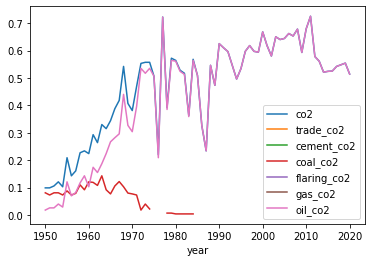

In [128]:
countries = [*set(list(emissions_df.country.values))]

for country in countries:
    emissions_by_type = emissions_df[emissions_df.country == country]
    emissions_by_type = emissions_by_type[['year', 'co2', 'trade_co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2']]
    emissions_by_type.plot(x = 'year', y = ['co2', 'trade_co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2'])
    plt.savefig(f'./figures/co2-breakdowns/{country}.png')

### 2.2 Share Global CO2

In [77]:
regional_df = emissions_df[emissions_df.year == 2020]
#regional_df = regional_df.groupby(by = 'region')
subregional_df = emissions_df[emissions_df.year == 2020]
#subregional_df = subregional_df.groupby(by = 'subregion')

<AxesSubplot:xlabel='year'>

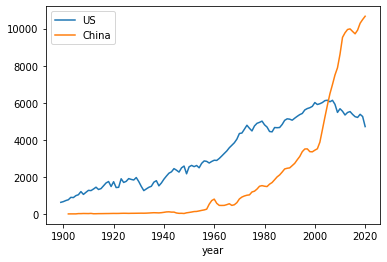

In [107]:
chn_us_emissions = pd.DataFrame()
chn_us_emissions['year'] = emissions_df[emissions_df.country == "United States"].year
chn_us_emissions['US'] = emissions_df[emissions_df.country == "United States"].co2
chn_us_emissions = chn_us_emissions.merge(emissions_df[emissions_df.country == "China"][['year', 'co2']], on="year")
chn_us_emissions.columns = ['year', 'US', 'China']
chn_us_emissions.plot(x = 'year', y = ['US', 'China'])

In [78]:
(regional_df.groupby(by = 'region').share_global_co2.sum()).sort_values(ascending = False)

region
UNKNOWN     349.06
Asia         58.39
Americas     19.44
Europe       14.16
Africa        3.77
Oceania       1.27
Name: share_global_co2, dtype: float64

In [79]:
(subregional_df.groupby(by = 'subregion').share_global_co2.sum()).sort_values(ascending = False)

subregion
UNKNOWN                            349.06
Eastern Asia                        36.53
Northern America                    15.08
Southern Asia                       10.26
Eastern Europe                       6.98
Western Asia                         5.43
South-eastern Asia                   4.73
Latin America and the Caribbean      4.36
Western Europe                       3.56
Sub-Saharan Africa                   2.24
Southern Europe                      2.05
Northern Europe                      1.57
Northern Africa                      1.53
Central Asia                         1.44
Australia and New Zealand            1.23
Melanesia                            0.04
Polynesia                            0.00
Micronesia                           0.00
Name: share_global_co2, dtype: float64

## 3. Country-specific Emissions
----

In [80]:
us_emissions_df = emissions_df[emissions_df['iso_code'] == "USA"]
china_emissions_df = emissions_df[emissions_df['iso_code'] == "CHN"]

<AxesSubplot:xlabel='year', ylabel='co2'>

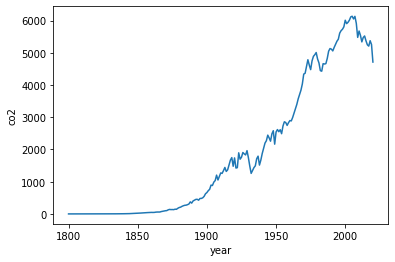

In [81]:
sns.lineplot(x=us_emissions_df['year'], y=us_emissions_df['co2'])

<AxesSubplot:xlabel='year', ylabel='share_global_co2'>

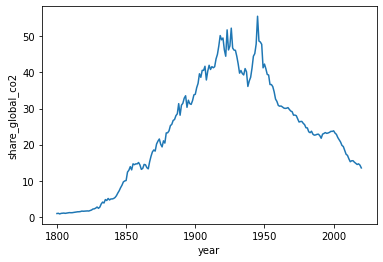

In [83]:
sns.lineplot(x=us_emissions_df['year'], y=us_emissions_df['share_global_co2'])

<AxesSubplot:xlabel='year', ylabel='co2'>

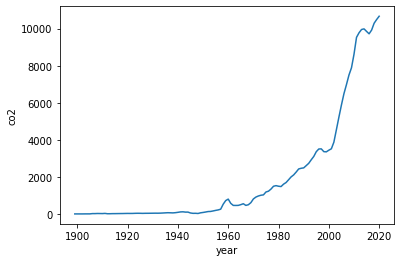

In [46]:
sns.lineplot(x=china_emissions_df['year'], y=china_emissions_df['co2'])

<AxesSubplot:xlabel='year', ylabel='share_global_co2'>

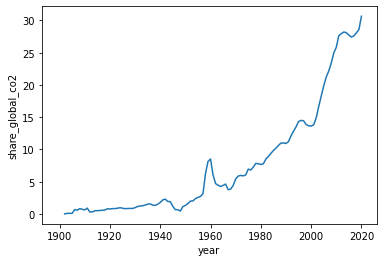

In [84]:
sns.lineplot(x=china_emissions_df['year'], y=china_emissions_df['share_global_co2'])

In [88]:
ts = us_emissions_df.year

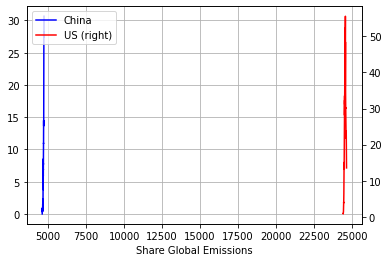

In [92]:
#plt.figure(figsize=(12,5))
plt.xlabel('Year')

ax1 = china_emissions_df.share_global_co2.plot(color='blue', grid=True, label='China')
ax2 = us_emissions_df.share_global_co2.plot(color='red', grid=True, secondary_y=True, label='US')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [ ]:
df.loc[:,['A','B']].plot(secondary_y=['B'], mark_right=False, figsize = (20,5), grid=True)

# Min / Max Emissions

In [22]:
countries = [*set(list(emissions_df.country.values))]
c_list = []
iso_list = []
max_y_list = []
max_co2_list = []
min_y_list = []
min_co2_list = []

for country in countries:
    country_emissions = emissions_df[emissions_df.country == country]
    try:
        max_row = country_emissions.loc[country_emissions['co2'].idxmax()]
        min_row = country_emissions.loc[country_emissions['co2'].idxmin()]

        c_list.append(country)
        iso_list.append(max_row['iso_code'])
        max_y_list.append(max_row['year'])
        min_y_list.append(min_row['year'])
        max_co2_list.append(max_row['co2'])
        min_co2_list.append(min_row['co2'])
        #print(f"{country} -- {max_row['year']} -- {max_row['co2']}")
    except:
        continue

co2_emissions_df = pd.DataFrame()

co2_emissions_df['country'] = c_list
co2_emissions_df['iso_code'] = iso_list
co2_emissions_df['max_year'] = max_y_list
co2_emissions_df['max_co2'] = max_co2_list
co2_emissions_df['min_year'] = min_y_list
co2_emissions_df['min_co2'] = min_co2_list
co2_emissions_df = co2_emissions_df.sort_values(by = 'country', ascending = True)

In [27]:
co2_emissions_df.to_csv(f"{data_path}interim/min_max_emissions_ALL.csv", index = False)

In [28]:
co2_emissions_countries_df = co2_emissions_df[co2_emissions_df['iso_code'].notna()]
co2_emissions_countries_df.to_csv(f"{data_path}interim/min_max_emissions_COUNTRIES.csv", index = False)

<AxesSubplot:ylabel='Frequency'>

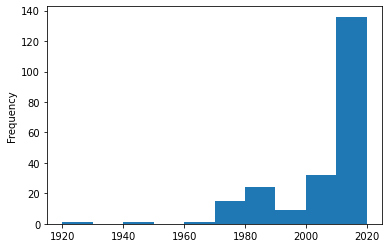

In [34]:
co2_emissions_countries_df.max_year.plot(kind="hist")

In [48]:
print(f"Total of {co2_emissions_countries_df[co2_emissions_countries_df.max_year >= 2000].shape[0]} countries with max emissions in the 21st century.")

Total of 168 countries with max emissions in the 21st century.


# Utility
----